<a href="https://colab.research.google.com/github/AdvaitKisar/House-Rent-Prediction---ML-Project/blob/main/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Rent Prediction**

## **Importing Libraries**

We are importing several libraries and few functions for modelling the data using different models. As this is a regression problem, we will be trying four different models, namely, **Linear Regression, Random Forest, XGBoost** and **Neural Network**.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler , OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestRegressor

from xgboost.sklearn import XGBRegressor

import seaborn as sns
import io

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.activations import relu, linear

## **Loading the Dataset**

We are loading the dataset from a local host and the dataset file has been named 'House_Rent_Dataset.csv'.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


The dataframe is read from the file uploaded in last step. We will display the head od the dataframe to get aware about the columns present.

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['House_Rent_Dataset.csv']))
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


We will drop the 'Area Locality' column as it is not useful in modelling as this column has a lot many unique values.

In [5]:
df = df.drop(['Area Locality'], axis=1)

## **Cleaning and Visualizing Data**

We will check for any missing data in the dataset and will correct it, if it's missing. In below setp, we checked the count of null enties in each column

In [13]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

The next step describes the data in a statistical manner and gives us an overview of the data.
It can be observed that the mean rent is about Rs. 34993.45 with a size of 967.49 sq.ft.

In [14]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In the below step, we have plotted a bar graph for House Rent in different Indian Cities based on Tenant Preferred. As per the plot, Bangalore, Delhi, Chennai and Kolkata have highest rents for Bachelor Tenants, whereas Hyderabad has highest rent for Family and Mumbai has higher rent for those properties, where this no particular preference.

<ipython-input-15-e3e7a7c7d036>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Tenant Preferred'], ci=None)


Text(0.5, 1.0, 'Rents in Indian Cities as per Tenant Preferred')

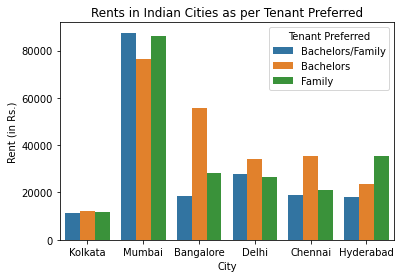

In [15]:
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Tenant Preferred'], ci=None)
plt.ylabel("Rent (in Rs.)")
plt.title('Rents in Indian Cities as per Tenant Preferred')

In the below step, we have plotted a bar graph for House Rent in different Indian Cities based on BHK. As per the plot, almost all cities have an increasing trend of rent with BHK.

<ipython-input-16-79082041c90f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['BHK'], ci=None)


Text(0.5, 1.0, 'Rents in Indian Cities as per BHK')

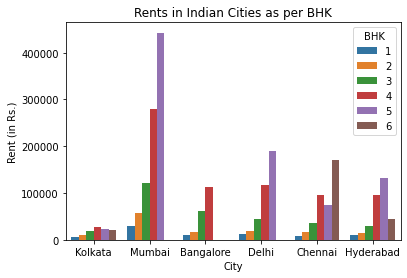

In [16]:
sns.barplot(x=df['City'], y=df['Rent'], hue=df['BHK'], ci=None)
plt.ylabel("Rent (in Rs.)")
plt.title('Rents in Indian Cities as per BHK')

In the below step, we have plotted a bar graph for House Rent in different Indian Cities based on Furnishing Status. As per the plot, all cities have lowest rent for unfurnished houses followed by semi-furnished and highest for furnished.

<ipython-input-17-f5e1b30d0189>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Furnishing Status'], ci=None)


Text(0.5, 1.0, 'Rents in Indian Cities as per Furnishing Status')

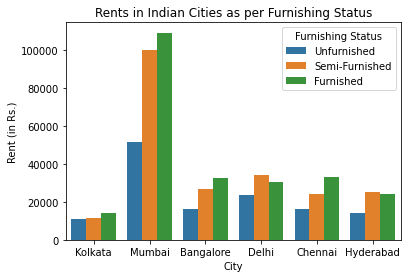

In [17]:
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Furnishing Status'], ci=None)
plt.ylabel("Rent (in Rs.)")
plt.title('Rents in Indian Cities as per Furnishing Status')

In the below step, we have plotted a bar graph for House Rent in different Indian Cities based on Area Type. As per the plot, all cities have lowest rent for built area followed by super area and highest for carpet area.

<ipython-input-18-13a33410d00f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None)


Text(0.5, 1.0, 'Rents in Indian Cities as per Area Type')

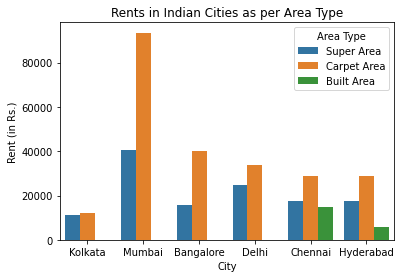

In [18]:
sns.barplot(x=df['City'], y=df['Rent'], hue=df['Area Type'], ci=None)
plt.ylabel("Rent (in Rs.)")
plt.title('Rents in Indian Cities as per Area Type')

## **Data Pre-processing**

Firstly, we will setup the *ColumnTransfer*, which combines the job of *LabelEncodder* and *OneHotEncoder*, so that we can convert the categorical data we have into features, which can be processed by the models built later easily, to generate insights.

In [19]:
oh = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

ms, ss = MinMaxScaler(), StandardScaler()

ct = ColumnTransformer([
    ('cat_encoder', oh, make_column_selector(dtype_include = 'object')),
    ('num_encoder', ms, make_column_selector(dtype_include = 'float64'))
], remainder = 'passthrough', n_jobs = -1)

We will split the data in *X* and *Y*. The test size is 20% of the entire data, which would be chosen randomly. Further, as *Y* is a 1D numpy array, it is reshaped as a 2D array for simplifying the steps later. The size of the dataset is 4746 examples.

In [20]:
X = df.drop(['Rent'], axis=1)
Y = df['Rent']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3796, 10)
(950, 10)
(3796, 1)
(950, 1)


We will transform the columns of the data using the *ColumnTransform* function built earlier.

In [21]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(3796, 514)
(950, 514)


## **Modelling Data**

### **Linear Regression**

In this model, we will use scikit-learn to model the data using **Linear** **Regression**. In this step, we are defining the *LinearRegression()* model and then fitting it to the training set.

In [22]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In this step, we are finding the prediction using the trained model of linear regression using the inputs X for training and test sets and compare the prediction (output) values with the target values Y we have beforehand.

In [23]:
Y_train_pred_linreg = lin_model.predict(X_train)
MAE_train_linreg = mean_absolute_error(Y_train, Y_train_pred_linreg)
print("Linear Regression Output:-")
print("The MAE on training set is Rs. {:.2f}".format(MAE_train_linreg))

Y_test_pred_linreg = lin_model.predict(X_test)
MAE_test_linreg = mean_absolute_error(Y_test, Y_test_pred_linreg)
print("The MAE on testing set is Rs. {:.2f}".format(MAE_test_linreg))

Linear Regression Output:-
The MAE on training set is Rs. 14583.30
The MAE on testing set is Rs. 26042.18


### **Random Forest**

In this model, we will use scikit-learn to model the data using Random Forest. In this step, we are defining the *RandomForestRegressor()* model and then fitting it to the training set.
The *n_estimators* denotes the number of decision trees used in the model and *min_samples_leaf* is minimum number of samples in a leaf.

In [24]:
model_RF = RandomForestRegressor(n_estimators=100, min_samples_leaf=1)
Y_train_RF = Y_train.reshape(-1)
Y_test_RF = Y_test.reshape(-1)
model_RF.fit(X_train, Y_train_RF)

RandomForestRegressor()

The accuracy on training and test sets is printed below. It can be seen that the model is overfitting the data. However, after tuning the parameters for Random Forest, any significant improvement is not observed in performance.

In [25]:
print("Random Forest Output:-")
print("The accuracy on training set is {:.2f} %".format(model_RF.score(X_train, Y_train_RF)*100))
print("The accuracy on testing set is {:.2f} %".format(model_RF.score(X_test, Y_test_RF)*100))

Random Forest Output:-
The accuracy on training set is 95.50 %
The accuracy on testing set is 23.13 %


Even the MAE indicates that the cost function is higher for test set as compared to training set.

In [26]:
Y_train_pred_RF = model_RF.predict(X_train)
MAE_train_RF = mean_absolute_error(Y_train, Y_train_pred_RF)
print("The MAE on training set is Rs. {:.2f}".format(MAE_train_RF))

Y_test_pred_RF = model_RF.predict(X_test)
MAE_test_RF = mean_absolute_error(Y_test, Y_test_pred_RF)
print("The MAE on testing set is Rs. {:.2f}".format(MAE_test_RF))

The MAE on training set is Rs. 4136.87
The MAE on testing set is Rs. 15521.31


### **XGBoost**

In this model, we will use scikit-learn to model the data using XGBoost. In this step, we are defining the XGBRegressor() model and then fitting it to the training set.

In [27]:
model_XGB = XGBRegressor()
fitted_data_XGB = model_XGB.fit(X_train, Y_train)

The MAE using XGBoost for test set is fairly close to training set and hence, in the three models seen so far, XGBoost has best performance.

In [28]:
Y_train_pred_XGB = model_XGB.predict(X_train)
MAE_train_XGB = mean_absolute_error(Y_train, Y_train_pred_XGB)
print("XGBoost Output:-")
print("The MAE on training set is Rs. {:.2f}".format(MAE_train_XGB))

Y_test_pred_XGB = model_XGB.predict(X_test)
MAE_test_XGB = mean_absolute_error(Y_test, Y_test_pred_XGB)
print("The MAE on testing set is Rs. {:.2f}".format(MAE_test_XGB))

XGBoost Output:-
The MAE on training set is Rs. 6778.11
The MAE on testing set is Rs. 16067.20


### **Neural Network**

In a Neural Network model, we are using 6 hidden layers with 5 layers having ReLU activation functions and the last layer having linear activation function.

In [29]:
model_NN = Sequential([
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=1, activation='linear'),
])

The model is optimized by using Adam Optimizer with an initial learning rate of 0.0005, and the loss function is Mean Squared Error. The metric used is accuracy for optimizers.

In [30]:
model_NN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=MeanSquaredError())

The model is now fitted on the training set, with 150 epochs. The learning rate and number of epochs is tuned for achieving higher performance.

In [31]:
n_epoch = 150
fitted_data_NN = model_NN.fit(X_train, Y_train, epochs=n_epoch)

Epoch 1/150
119/119 [==============================] - 2s 4ms/step - loss: 4199335936.0000
Epoch 2/150
119/119 [==============================] - 1s 5ms/step - loss: 2637669632.0000
Epoch 3/150
119/119 [==============================] - 1s 5ms/step - loss: 2344849920.0000
Epoch 4/150
119/119 [==============================] - 1s 5ms/step - loss: 2337231104.0000
Epoch 5/150
119/119 [==============================] - 0s 3ms/step - loss: 2336789248.0000
Epoch 6/150
119/119 [==============================] - 0s 4ms/step - loss: 2330461440.0000
Epoch 7/150
119/119 [==============================] - 0s 3ms/step - loss: 2335604736.0000
Epoch 8/150
119/119 [==============================] - 0s 3ms/step - loss: 2330961920.0000
Epoch 9/150
119/119 [==============================] - 0s 3ms/step - loss: 2325350912.0000
Epoch 10/150
119/119 [==============================] - 0s 3ms/step - loss: 2323876352.0000
Epoch 11/150
119/119 [==============================] - 0s 3ms/step - loss: 2328523520.00

In [32]:
model_NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               131840    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169,169
Trainable params: 169,169
Non-trai

The MAE for Neural Network is printed below. This performance is slightly lower than XGBoost.

In [33]:
print("Neural Network Output:-")
score_NN = model_NN.evaluate(X_test, Y_test)
print(score_NN)
Y_train_pred_NN = model_NN.predict(X_train)
MAE_train_NN = mean_absolute_error(Y_train_pred_NN, Y_train)
print("The MAE on training set is Rs. {:.2f}".format(MAE_train_NN))
Y_test_pred_NN = model_NN.predict(X_test)
MAE_test_NN = mean_absolute_error(Y_test_pred_NN, Y_test)
print("The MAE on testing set is Rs. {:.2f}".format(MAE_test_NN))

Neural Network Output:-
30/30 [==============================] - 0s 1ms/step - loss: 13653433344.0000
13653433344.0
119/119 [==============================] - 0s 1ms/step
The MAE on training set is Rs. 10641.57
30/30 [==============================] - 0s 1ms/step
The MAE on testing set is Rs. 18438.05


The cost function plot is plotted below. The cost initially monotonically decreases, and later it oscillates with small amplitude further decreasing at a slower rate.

The final cost function value of training set is 847049216.0


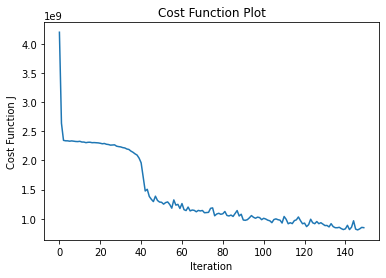

In [34]:
J = fitted_data_NN.history['loss']
plt.plot(J)
plt.title('Cost Function Plot')
plt.xlabel('Iteration')
plt.ylabel('Cost Function J')
print("The final cost function value of training set is {}".format(J[-1]))

## **Summary**

To summarize, the dataset is modelled using 4 different models, and the performance for these models in descending order are as follows:-
1.   Random Forest
2.   XGBoost
3.   Neural Network
4.   Linear Regression

This order has been obtained after several iterations of Hyperparameter Tuning, especially for Neural Network. However, this may not be the final order because further hypertuning might change the order. The reason for this is that there is the optimum values of hyperparameters cannot be exactly found out using trying out different values.

Moreover, an important inference from the accuracy of different algorithms indicates that the data is insufficient, as most of the models are overfitting.